# NLP Project - SemEval2023 Task 3 subtask 1 - Detecting the category in online news in a multi-lingual setup

## Install modules

In [ ]:
!pip install -q -U --no-cache-dir gdown --pre
!pip install -q transformers datasets evaluate accelerate
!pip install -q requests nlpaug sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00


In [ ]:
!pip install -q googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 8.4 MB/s eta 0:00:00


In [ ]:
# !pip install -q wandb

## Setup GPU

In [ ]:
!nvidia-smi

Tue Jan 17 16:50:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import libraries

In [ ]:
# Standard modules

import os
import numpy as np
import pandas as pd

from tqdm import tqdm

# Pytorch

from torch import nn, tensor

# Hugging face

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, ClassLabel, load_metric
import evaluate

# Nlpaug

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
# google translator
import googletrans
from googletrans import Translator

## Import data


In [ ]:
if not os.path.exists("/content/data.zip"):
    !gdown 1NcqdaF3HLXMlDzOnURpyVXaZj37f4MZA
!unzip -qq data.zip


Downloading...
From: https://drive.google.com/uc?id=1NcqdaF3HLXMlDzOnURpyVXaZj37f4MZA
To: /content/data.zip
100% 19.5M/19.5M [00:01<00:00, 13.3MB/s]


#### function for reading data (provided by task organisers)

In [ ]:
def make_dataframe(input_folder, labels_folder=None):
    #MAKE TXT DATAFRAME
    text = []
    
    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):

        iD, txt = fil[7:].split('.')[0], open(input_folder +fil, 'r', encoding='utf-8').read() 
        text.append((iD, txt))

    df_text = pd.DataFrame(text, columns=['id','text']).set_index('id')

    df = df_text

    #MAKE LABEL DATAFRAME
    if labels_folder:
        labels = pd.read_csv(labels_folder, sep='\t', header=None)
        labels = labels.rename(columns={0:'id',1:'type'})
        labels.id = labels.id.apply(str)
        labels = labels.set_index('id')

        #JOIN
        df = labels.join(df_text)[['text','type']]

    return df

#### helper functions

In [ ]:
def class_distr(class_col: str, df: pd.DataFrame):
    total_samples = df.count()
    print("Total number of samples:")
    print(total_samples)

    class_distr = df.groupby(class_col)[class_col].count()
    print("\nclass distribution:")
    print(class_distr)

    percentage_distr = class_distr.div(class_distr.sum()).round(2)
    print("\n class distribution in %:")
    print(percentage_distr)

    percentage_distr.plot(kind="bar", title="Class distribution", xlabel="class", ylabel="percentage")

def words_per_sample(list_of_texts: list):
    
    num_words = [len(s.split()) for s in list_of_texts]
    return np.median(num_words)

def plot_sample_length_distr(sample_texts):
    """Plots the sample length distribution.
    """

    num_words = [len(s.split()) for s in sample_texts]
    plt.hist(num_words, 50)
    plt.xlabel('Length of a sample [words]nump')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

## Create dataset

In [ ]:
def read_lang_data(train_folder, train_labels, test_folder):
  # read train data
  df_train_lang = make_dataframe(train_folder, train_labels)
  df_train_lang = df_train_lang.rename(columns={"type" : "label"})

  # read test data
  df_test_lang = make_dataframe(test_folder, labels_folder = None)

  return df_train_lang, df_test_lang

In [ ]:
# TODO: loop for reading all languages and merging them

data_dict = {}
languages = ['en', 'fr', 'ge', 'it', 'po', 'ru']

for lang in languages:

  train_folder = f"data/{lang}/train-articles-subtask-1/"
  train_labels = f"data/{lang}/train-labels-subtask-1.txt"
  test_folder =  f"data/{lang}/dev-articles-subtask-1/"

  df_train, df_test = read_lang_data(train_folder, train_labels, test_folder)

  data_dict[lang] = {'train': df_train, 'test': df_test}

433it [00:00, 2675.69it/s]
83it [00:00, 2243.46it/s]
157it [00:00, 2635.89it/s]
54it [00:00, 2897.21it/s]
132it [00:00, 2565.55it/s]
45it [00:00, 2512.46it/s]
226it [00:00, 3050.16it/s]
77it [00:00, 2908.15it/s]
144it [00:00, 2405.96it/s]
50it [00:00, 2307.30it/s]
142it [00:00, 2989.44it/s]
49it [00:00, 2302.70it/s]


In [ ]:
data_dict['ru']['train']

,text,label
id,,
24144,О крепком рубле и «голландской болезни роста» ...,opinion
24129,Георгий Гахария: Осуждаю буллинг послов со сто...,opinion
24122,В США раскрыли неприятную правду для Байдена\n...,opinion
24124,"В Крыму заявили, что воссоединение юга Украины...",opinion
2450,Андрей Союстов: Европейскими трендсеттерами ст...,opinion
...,...,...
24108,«Европарламент стал жертвой фейков» - председа...,reporting
2471,"Спецоперация, 20 июня: российские военные унич...",reporting
24176,В парламенте Венгрии назвали политику антиросс...,reporting


In [ ]:
# All labels

datasets = {}

for key,el in data_dict.items():
  labels = ['opinion', 'satire', 'reporting']
  ClassLabels = ClassLabel(num_classes=len(labels), names=labels)

  # Create hugging face dataset, adjusted to torch format and splitted for train/val in 80/20 ratio
  dataset = Dataset.from_pandas(el['train'], preserve_index=True).cast_column("label", ClassLabels).train_test_split(test_size=0.2)

  datasets[key] = dataset

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

## Oversampling

In [ ]:
translator = Translator()

In [ ]:
lang_code = {'en': 'en', 'fr' :'fr', 'ge': 'de', 'it': 'it', 'po': 'pl', 'ru': 'ru' }

In [ ]:
source = lang_code['en']
destinations = ['zh-CN', 'ja']
to_translate = datasets['en']['train'].filter(lambda x: x["label"] != 0)

new_items = []
for destination in destinations:
    for article in to_translate:
        translated_text = translator.translate(article['text'], src=source, dest=destination).text
        new_text =  translator.translate(translated_text, src=destination, dest=source).text

        new_article = {'label': article['label'], 'text': new_text}
        new_items.append(new_article)

for item in new_items:
  datasets['en']['train'] = datasets['en']['train'].add_item(item)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
source = lang_code['fr']
destinations = ['zh-CN', 'ja']
to_translate = datasets['fr']['train'].filter(lambda x: x["label"] != 0)

new_items = []
for destination in destinations:
    for article in to_translate:
        translated_text = translator.translate(article['text'], src=source, dest=destination).text
        new_text =  translator.translate(translated_text, src=destination, dest=source).text

        new_article = {'label': article['label'], 'text': new_text}
        new_items.append(new_article)

for item in new_items:
    datasets['fr']['train'] = datasets['fr']['train'].add_item(item)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
source = lang_code['ge']
destinations = ['zh-CN', 'ja']
to_translate = datasets['ge']['train'].filter(lambda x: x["label"] != 0)

new_items = []

for destination in destinations:
    for article in to_translate:
        translated_text = translator.translate(article['text'], src=source, dest=destination).text
        new_text =  translator.translate(translated_text, src=destination, dest=source).text

        new_article = {'label': article['label'], 'text': new_text}
        new_items.append(new_article)

for item in new_items:
    datasets['ge']['train'] = datasets['ge']['train'].add_item(item)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
source = lang_code['it']
destinations = ['zh-CN', 'ja']
to_translate = datasets['it']['train'].filter(lambda x: x["label"] != 0)

new_items = []

for destination in destinations:
    for article in to_translate:
        translated_text = translator.translate(article['text'], src=source, dest=destination).text
        new_text =  translator.translate(translated_text, src=destination, dest=source).text

        new_article = {'label': article['label'], 'text': new_text}
        new_items.append(new_article)

for item in new_items:
    datasets['it']['train'] = datasets['it']['train'].add_item(item)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
source = lang_code['po']
destinations = ['zh-CN', 'ja']
to_translate = datasets['po']['train'].filter(lambda x: x["label"] != 0)

new_items = []

for destination in destinations:
    for article in to_translate:
        translated_text = translator.translate(article['text'], src=source, dest=destination).text
        new_text =  translator.translate(translated_text, src=destination, dest=source).text

        new_article = {'label': article['label'], 'text': new_text}
        new_items.append(new_article)

for item in new_items:
    datasets['po']['train'] = datasets['po']['train'].add_item(item)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
source = lang_code['ru']
destinations = ['zh-CN', 'ja']
to_translate = datasets['ru']['train'].filter(lambda x: x["label"] != 0)

new_items = []

for destination in destinations:
    for article in to_translate:
        translated_text = translator.translate(article['text'], src=source, dest=destination).text
        new_text =  translator.translate(translated_text, src=destination, dest=source).text

        new_article = {'label': article['label'], 'text': new_text}
        new_items.append(new_article)

for item in new_items:
    datasets['ru']['train'] = datasets['ru']['train'].add_item(item)

  0%|          | 0/1 [00:00<?, ?ba/s]

## Setup metrics

In [ ]:
def eval_metrics(eval_pred):
    metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metrics.compute(predictions=predictions, references=labels, average="macro")

In [ ]:
f1_metric = evaluate.load("f1")
recall_metric = evaluate.load("recall")
precision_metric = evaluate.load("precision")
accuracy_metric = evaluate.load("accuracy")

def eval_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis = -1)
    
    results = {}
    results.update(accuracy_metric.compute(predictions=preds, references = labels))
    results.update(recall_metric.compute(predictions=preds, references = labels, average="macro"))
    results.update(precision_metric.compute(predictions=preds, references = labels, average="macro"))
    results.update(f1_metric.compute(predictions=preds, references = labels, average="macro"))

    return results

## Bert base multilingual model

### Tokenization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-uncased/snapshots/800c34f3d5aa174fe531f560b44b8d14592225b7/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_si

In [ ]:
tokenized_datasets = {}

for key,el in datasets.items():
    tokenized_datasets[key] = el.map(tokenize_function, batched=True, remove_columns=["text"])


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets

{'en': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
         num_rows: 428
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
         num_rows: 87
     })
 }), 'fr': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
         num_rows: 203
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
         num_rows: 32
     })
 }), 'ge': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
         num_rows: 181
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
         num_rows: 27
     })
 }), 'it': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'token_type_

### Download model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=len(labels))

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-uncased/snapshots/800c34f3d5aa174fe531f560b44b8d14592225b7/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "fir

## Xlm-Roberta-base

### Tokenization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/sentencepiece.bpe.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_r

In [ ]:
tokenized_datasets = {}

for key,el in datasets.items():
    tokenized_datasets[key] = el.map(tokenize_function, batched=True, remove_columns=["text"])

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets

{'en': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 346
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 87
     })
 }), 'fr': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 125
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 32
     })
 }), 'ge': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 105
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 27
     })
 }), 'it': DatasetDict({
     train: Dataset({
         features: ['label', 'id', 'input_ids', 'attention_mask'],
         num_rows: 180
     })
     test: Dataset({
         features: ['label', 'id', 'input_ids', '

### Download model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(labels))

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.den

## Training


#### Prepare for training

In [ ]:
def model_init_xlm():
    return AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", hidden_dropout_prob=0.25, attention_probs_dropout_prob=0.25, num_labels=len(labels))
    #return AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(labels))
def model_init_bert():
    #return AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", hidden_dropout_prob=0.4, attention_probs_dropout_prob=0.4, num_labels=len(labels))
    return AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=len(labels))

In [ ]:
# create merged train set:

merged_train_set = pd.DataFrame()
merged_test_set = pd.DataFrame()

df_train_list = []
df_test_list = []

for key,el in tokenized_datasets.items():

    df_train_list.append(el['train'].to_pandas())
    df_test_list.append(el['test'].to_pandas())

merged_train_set = pd.concat(df_train_list)
merged_test_set = pd.concat(df_test_list)

In [ ]:
train_dataset = Dataset.from_pandas(merged_train_set)
test_dataset = Dataset.from_pandas(merged_test_set)

In [ ]:
train_dataset

Dataset({
    features: ['label', 'id', 'input_ids', 'token_type_ids', 'attention_mask', '__index_level_0__'],
    num_rows: 1444
})

In [ ]:
print(len(train_dataset.filter(lambda x: x["label"] == 0)))
print(len(train_dataset.filter(lambda x: x["label"] == 1)))
print(len(train_dataset.filter(lambda x: x["label"] == 2)))

  0%|          | 0/2 [00:00<?, ?ba/s]

754


  0%|          | 0/2 [00:00<?, ?ba/s]

171


  0%|          | 0/2 [00:00<?, ?ba/s]

519


#### Add class_weight for unbalanced datasets

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
y = train_dataset['label']

class_weights=compute_class_weight(class_weight='balanced', classes=np.unique(y), y=np.asarray(y))
class_weights=tensor(class_weights,dtype=torch.float).cuda()
print(class_weights)

tensor([0.5378, 3.4914, 1.1705], device='cuda:0')


In [ ]:
class CustomTrainer(Trainer):
   def compute_loss(self, model, inputs, return_outputs=False):
       labels = inputs.get("labels")
       # forward pass
       outputs = model(**inputs)
       logits = outputs.get('logits')
       # compute custom loss
       # class_weights = tensor([1-382/433, 1-41/433, 1-10/433]).cuda()
       # class_weights = tensor([1- label_0/sum, 1- label_1/sum, 1- label_2/sum]).cuda()
       loss_fct = nn.CrossEntropyLoss(weight = class_weights)
       loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
       return (loss, outputs) if return_outputs else loss

#### Training and evaluating xlm

##### Set trainer

In [ ]:
training_args = TrainingArguments(
    output_dir="output_trainer", 
    evaluation_strategy="epoch", 
    logging_strategy = "epoch",
    skip_memory_metrics=True,
    #weight_decay = 0.1,
    num_train_epochs=5,
    #learning_rate=5e-05,                           
    report_to="all"
)

trainer = Trainer(
    model_init=model_init_xlm,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=eval_metrics,
)

PyTorch: setting up devices
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.25,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.25,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type

##### Train

In [ ]:
trainer.train()

##### Evaluate each dataset

In [ ]:
trainer.evaluate(tokenized_datasets['en']['test'])

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: id. If id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 87
  Batch size = 8


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.5851154923439026,
 'eval_accuracy': 0.8275862068965517,
 'eval_recall': 0.3333333333333333,
 'eval_precision': 0.27586206896551724,
 'eval_f1': 0.3018867924528302,
 'eval_runtime': 2.6283,
 'eval_samples_per_second': 33.102,
 'eval_steps_per_second': 4.185,
 'epoch': 5.0}

In [ ]:
trainer.evaluate(tokenized_datasets['fr']['test'])

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: id. If id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 32
  Batch size = 8


{'eval_loss': 0.520576000213623,
 'eval_accuracy': 0.71875,
 'eval_recall': 0.8200000000000001,
 'eval_precision': 0.71875,
 'eval_f1': 0.6945917285259808,
 'eval_runtime': 1.1302,
 'eval_samples_per_second': 28.313,
 'eval_steps_per_second': 3.539,
 'epoch': 8.0}

In [ ]:
trainer.evaluate(tokenized_datasets['po']['test'])

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: id. If id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 29
  Batch size = 8


{'eval_loss': 1.3608088493347168,
 'eval_accuracy': 0.5517241379310345,
 'eval_recall': 0.5166666666666667,
 'eval_precision': 0.6666666666666666,
 'eval_f1': 0.4583333333333333,
 'eval_runtime': 1.0072,
 'eval_samples_per_second': 28.793,
 'eval_steps_per_second': 3.971,
 'epoch': 8.0}

In [ ]:
trainer.evaluate(tokenized_datasets['ge']['test'])

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: id. If id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 27
  Batch size = 8


{'eval_loss': 0.9270930886268616,
 'eval_accuracy': 0.48148148148148145,
 'eval_recall': 0.4666666666666666,
 'eval_precision': 0.4158730158730159,
 'eval_f1': 0.41830065359477125,
 'eval_runtime': 0.9717,
 'eval_samples_per_second': 27.787,
 'eval_steps_per_second': 4.117,
 'epoch': 8.0}

In [ ]:
trainer.evaluate(tokenized_datasets['it']['test'])

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: id. If id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 46
  Batch size = 8


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.9310897588729858,
 'eval_accuracy': 0.717391304347826,
 'eval_recall': 0.4298245614035088,
 'eval_precision': 0.3766233766233766,
 'eval_f1': 0.39161966156325545,
 'eval_runtime': 1.5655,
 'eval_samples_per_second': 29.383,
 'eval_steps_per_second': 3.833,
 'epoch': 8.0}

In [ ]:
trainer.evaluate(tokenized_datasets['ru']['test'])

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: id. If id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 29
  Batch size = 8


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6144499778747559,
 'eval_accuracy': 0.7586206896551724,
 'eval_recall': 0.525925925925926,
 'eval_precision': 0.49673202614379086,
 'eval_f1': 0.509090909090909,
 'eval_runtime': 1.0284,
 'eval_samples_per_second': 28.198,
 'eval_steps_per_second': 3.889,
 'epoch': 8.0}

#### Training and evaluating bert-base

In [ ]:
training_args = TrainingArguments(
    output_dir="output_trainer", 
    auto_find_batch_size = True,
    evaluation_strategy="epoch", 
    logging_strategy = "epoch",
    skip_memory_metrics=True,
    #weight_decay = 0.07,
    num_train_epochs=5,
    #learning_rate=4e-05,                             
    report_to="all"
)

trainer = Trainer(
    model_init=model_init_bert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=eval_metrics,
)

PyTorch: setting up devices
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-uncased/snapshots/800c34f3d5aa174fe531f560b44b8d14592225b7/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head"

### Tuning

In [ ]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 3e-6, 3e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8]),
        "weight_decay": trial.suggest_float("weight_decay", 0.07, 0.2, log=True)
    }



def my_objective(metrics):
  return metrics['eval_f1']

In [ ]:
best_trial = trainer.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=5,
    compute_objective=my_objective
)

In [ ]:
best_trial

BestRun(run_id='2383wdca', objective=2.427610743549331, hyperparameters={'learning_rate': 4.169506713350076e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'weight_decay': 0.17204671942953031, 'assignments': {}, 'metric': 'eval/loss'})

### Trening

In [ ]:
trainer.train()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-uncased/snapshots/800c34f3d5aa174fe531f560b44b8d14592225b7/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "fir

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.802500,0.600075,0.780000,0.433658,0.475945,0.439838
2,0.536200,0.624478,0.788000,0.600452,0.644655,0.619497
3,0.316600,0.833674,0.796000,0.549582,0.709225,0.596900
4,0.121700,1.246413,0.772000,0.585486,0.681083,0.606476
5,0.054200,1.174478,0.788000,0.604272,0.648495,0.622344


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, id. If __index_level_0__, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 250
  Batch size = 8
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, id. If __index_level_0__, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2

TrainOutput(global_step=905, training_loss=0.36621541397347634, metrics={'train_runtime': 802.0878, 'train_samples_per_second': 9.002, 'train_steps_per_second': 1.128, 'total_flos': 1899678875996160.0, 'train_loss': 0.36621541397347634, 'epoch': 5.0})

### Ewaluacja

In [ ]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, __index_level_0__. If id, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 250
  Batch size = 8


{'eval_loss': 0.5948110818862915,
 'eval_accuracy': 0.776,
 'eval_recall': 0.6244346984707937,
 'eval_precision': 0.7284934576736789,
 'eval_f1': 0.6157034242268337,
 'eval_runtime': 8.4519,
 'eval_samples_per_second': 29.579,
 'eval_steps_per_second': 3.786,
 'epoch': 6.0}

In [ ]:
trainer.evaluate(tokenized_datasets['ge']['test'])

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id. If id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 27
  Batch size = 8


{'eval_loss': 1.6336976289749146,
 'eval_accuracy': 0.7037037037037037,
 'eval_recall': 0.5251461988304094,
 'eval_precision': 0.7206349206349206,
 'eval_f1': 0.5666666666666668,
 'eval_runtime': 1.0178,
 'eval_samples_per_second': 26.528,
 'eval_steps_per_second': 3.93,
 'epoch': 5.0}

## Poprzedni etap

In [ ]:
import os
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from tqdm import tqdm
import os

from pprint import pprint
from collections import Counter

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# SMOTE
from imblearn.over_sampling import SMOTE

# Transformers
from transformers import AutoTokenizer

# sklearn
from sklearn import svm
import sklearn.preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, ShuffleSplit 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix, ConfusionMatrixDisplay

### Language - English

### Part 1 - Analyze and process data

#### Analyze data

##### Load data

In [ ]:
train_folder = "data/en/train-articles-subtask-1/"
train_labels = "data/en/train-labels-subtask-1.txt"

test_folder = "data/en/dev-articles-subtask-1/"

In [ ]:
df_train = make_dataframe(train_folder, train_labels)
df_test = make_dataframe(test_folder, labels_folder = None)

433it [00:00, 6098.50it/s]
83it [00:00, 5928.50it/s]


In [ ]:
df_train.head()

,text,type
id,,
833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire
832959523,How Theresa May Botched\n\nThose were the time...,satire
833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire
833032367,Robert Mueller Not Recommending Any More Indic...,satire
814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire


In [ ]:
df_test.head()

,text
id,
813452859,EU Profits From Trading With UK While London L...
813494037,Sadiq Khan Slammed for Pro-EU 'Message of Supp...
813547724,Foreign Secretary Jeremy Hunt says the UK shou...
813552066,"You insult us, ambassador: Woody Johnson flagr..."
813601978,Big Apple joins in ringing in New Year after r...


##### check data characteristics

Total number of samples:
text    433
type    433
dtype: int64

class distribution:
type
opinion      382
reporting     41
satire        10
Name: type, dtype: int64

 class distribution in %:
type
opinion      0.88
reporting    0.09
satire       0.02
Name: type, dtype: float64


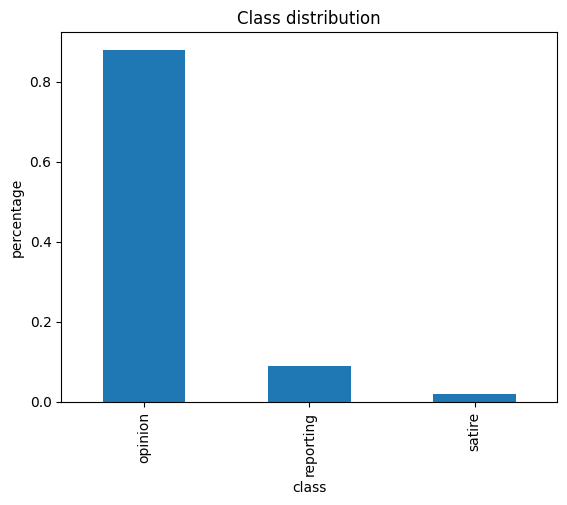

In [ ]:
class_distr(class_col="type", df = df_train)

In [ ]:
words_per_sample_train = words_per_sample(df_train["text"]) 
words_per_sample_test = words_per_sample(df_test["text"]) 
print(f"\n Median number of words per sample in train set: {words_per_sample_train}")
print(f"\n Median number of words per sample in test set: {words_per_sample_test}")


 Median number of words per sample in train set: 685.0

 Median number of words per sample in test set: 695.0


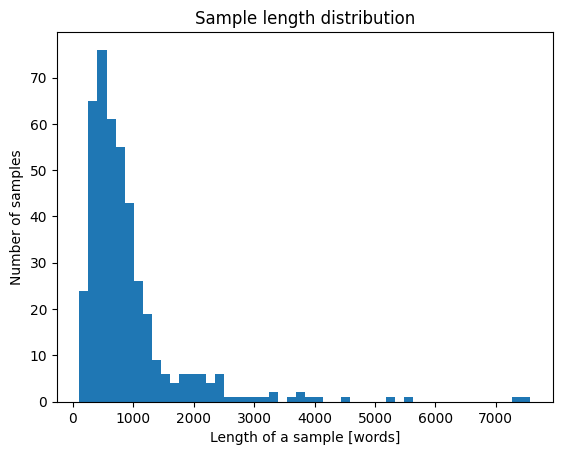

In [ ]:
plot_sample_length_distr(df_train["text"])

In [ ]:
num_samples_train = df_train.count().values[0]
num_samples_test = df_test.count().values[0]

train_ratio =  num_samples_train/words_per_sample_train
test_ratio = num_samples_test/ words_per_sample_test
print(train_ratio)
print(test_ratio)

0.6321167883211679
0.11942446043165468


#### Process data

#### Clean special characters and whitespaces

In [ ]:
df_list =  [df_train, df_test]

for df in df_list:

    white_spaces = ["\r", "\n","\t", "    "]
    punctuation_signs = list("?:!.,;")

    df['text_clean_1'] = df['text']

    # whitespaces
    for char in white_spaces:
        df['text_clean_1'] = df['text_clean_1'].str.replace(char, " ")

    # quotation marks
    df['text_clean_1'] = df['text_clean_1'].str.replace('"', '')

    # puncuation signs
    for sign in punctuation_signs:
        df['text_clean_1'] = df['text_clean_1'].str.replace(sign, '')

C:\Users\kasia\AppData\Local\Temp\ipykernel_8156\100976079.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text_clean_1'] = df['text_clean_1'].str.replace(sign, '')
C:\Users\kasia\AppData\Local\Temp\ipykernel_8156\100976079.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text_clean_1'] = df['text_clean_1'].str.replace(sign, '')


In [ ]:
df_train.head()

,text,type,text_clean_1
id,,,
833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire,Chelsea Handler Admits She’s ‘Very Sexually At...
832959523,How Theresa May Botched\n\nThose were the time...,satire,How Theresa May Botched Those were the times…...
833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire,Robert Mueller III Rests His Case—Dems NEVER W...
833032367,Robert Mueller Not Recommending Any More Indic...,satire,Robert Mueller Not Recommending Any More Indic...
814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire,The Far Right Is Trying to Co-opt the Yellow V...


#### Make all lowercase

In [ ]:
for df in df_list:
    df['text_clean_2'] = df['text_clean_1'].str.lower()

In [ ]:
df_train.head()

,text,type,text_clean_1,text_clean_2
id,,,,
833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire,Chelsea Handler Admits She’s ‘Very Sexually At...,chelsea handler admits she’s ‘very sexually at...
832959523,How Theresa May Botched\n\nThose were the time...,satire,How Theresa May Botched Those were the times…...,how theresa may botched those were the times…...
833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire,Robert Mueller III Rests His Case—Dems NEVER W...,robert mueller iii rests his case—dems never w...
833032367,Robert Mueller Not Recommending Any More Indic...,satire,Robert Mueller Not Recommending Any More Indic...,robert mueller not recommending any more indic...
814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire,The Far Right Is Trying to Co-opt the Yellow V...,the far right is trying to co-opt the yellow v...


#### Remove 's

In [ ]:
for df in df_list:
    df['text_clean_3'] = df['text_clean_2'].str.replace("'", "")
    df['text_clean_3'] = df['text_clean_3'].str.replace("‘", "")
    df['text_clean_3'] = df['text_clean_3'].str.replace("’s", "")

In [ ]:
df_train.head()

,text,type,text_clean_1,text_clean_2,text_clean_3
id,,,,,
833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire,Chelsea Handler Admits She’s ‘Very Sexually At...,chelsea handler admits she’s ‘very sexually at...,chelsea handler admits she very sexually attra...
832959523,How Theresa May Botched\n\nThose were the time...,satire,How Theresa May Botched Those were the times…...,how theresa may botched those were the times…...,how theresa may botched those were the times…...
833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire,Robert Mueller III Rests His Case—Dems NEVER W...,robert mueller iii rests his case—dems never w...,robert mueller iii rests his case—dems never w...
833032367,Robert Mueller Not Recommending Any More Indic...,satire,Robert Mueller Not Recommending Any More Indic...,robert mueller not recommending any more indic...,robert mueller not recommending any more indic...
814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire,The Far Right Is Trying to Co-opt the Yellow V...,the far right is trying to co-opt the yellow v...,the far right is trying to co-opt the yellow v...


#### Remove stop words and lemmatize

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

print(stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kasia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kasia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kasia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
for df in df_list:
    df['text_clean_4'] = df['text_clean_3']

    lemmatized_texts = []

    for row in df['text_clean_4']:
        text = row
        word_tokens = text.split(" ")

        lemmas  = []
        lemmatized_text = []

        for word in word_tokens:
            if word not in stop_words:
                lemmas.append(lemmatizer.lemmatize(word, pos = 'v'))

        lemmatized_text = " ".join(lemmas)

        lemmatized_texts.append(lemmatized_text)
        
    df['text_clean_4']= lemmatized_texts


In [ ]:
df_train.head()

,text,type,text_clean_1,text_clean_2,text_clean_3,text_clean_4
id,,,,,,
833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire,Chelsea Handler Admits She’s ‘Very Sexually At...,chelsea handler admits she’s ‘very sexually at...,chelsea handler admits she very sexually attra...,chelsea handler admit sexually attract robert ...
832959523,How Theresa May Botched\n\nThose were the time...,satire,How Theresa May Botched Those were the times…...,how theresa may botched those were the times…...,how theresa may botched those were the times…...,theresa may botch times… time page 1 january ...
833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire,Robert Mueller III Rests His Case—Dems NEVER W...,robert mueller iii rests his case—dems never w...,robert mueller iii rests his case—dems never w...,robert mueller iii rest case—dems never carlo...
833032367,Robert Mueller Not Recommending Any More Indic...,satire,Robert Mueller Not Recommending Any More Indic...,robert mueller not recommending any more indic...,robert mueller not recommending any more indic...,robert mueller recommend indictments course m...
814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire,The Far Right Is Trying to Co-opt the Yellow V...,the far right is trying to co-opt the yellow v...,the far right is trying to co-opt the yellow v...,far right try co-opt yellow vest weekend manc...


In [ ]:
df_train['text_clean_4'][:5]


id
833042063    chelsea handler admit sexually attract robert ...
832959523    theresa may botch  times… time page 1 january ...
833039623    robert mueller iii rest case—dems never  carlo...
833032367    robert mueller recommend indictments  course m...
814777937    far right try co-opt yellow vest  weekend manc...
Name: text_clean_4, dtype: object

In [ ]:
for df in df_list:
    df["text_cleaned"] = df["text_clean_4"]
        
df_train = df_train[['text_cleaned', 'type']]
df_test = df_test[['text_cleaned']]

In [ ]:
df_train.head(2)

,text_cleaned,type
id,,
833042063,chelsea handler admit sexually attract robert ...,satire
832959523,theresa may botch times… time page 1 january ...,satire


In [ ]:
df_test.head(2)

,text_cleaned
id,
813452859,eu profit trade uk london lose money – politic...
813494037,sadiq khan slam pro-eu message support firewor...


### Encode labels

In [ ]:
labels_mapping = {'opinion':0, 'reporting':1, 'satire': 2}

df_train["label"] = df_train["type"] 
df_train = df_train.replace({'label': labels_mapping})
df_train = df_train[['text_cleaned', 'label']]

df_train.head()

C:\Users\kasia\AppData\Local\Temp\ipykernel_8156\4129379699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"] = df_train["type"]


,text_cleaned,label
id,,
833042063,chelsea handler admit sexually attract robert ...,2
832959523,theresa may botch times… time page 1 january ...,2
833039623,robert mueller iii rest case—dems never carlo...,2
833032367,robert mueller recommend indictments course m...,2
814777937,far right try co-opt yellow vest weekend manc...,2


#### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train['text_cleaned'], df_train['label'], test_size=0.3, random_state=42)

In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(303, 300)
(130, 300)


### SMOTE

In [ ]:
dictionary_count = Counter(labels_train)
dictionary_count.get(0)

266

In [ ]:
num_0 = dictionary_count.get(0)
num_1 = dictionary_count.get(1)
num_2 = dictionary_count.get(2)

sm = SMOTE(random_state=42, k_neighbors=3, sampling_strategy= {0: num_0*4, 1: num_1*4, 2: num_2*4} )
features_train, labels_train = sm.fit_resample(features_train, labels_train)

d:\OneDrive\OneDrive - Politechnika Warszawska\SEMY MGR\SEM 1\NLP\projekt\source\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1064) in class 0 will be larger than the number of samples in the majority class (class #0 -> 266)
  warnings.warn(


In [ ]:
Counter(labels_train)

Counter({0: 1064, 1: 128, 2: 20})

### SVM Model

### Cross-Validation for Hyperparameter tuning

In [ ]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())


Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


### Randomized search cross validation

* C: Penalty parameter C of the error term.
* kernel: Specifies the kernel type to be used in the algorithm.
* gamma: Kernel coefficient.
* degree: Degree of the polynomial kernel function.

In [ ]:
# C
C = [.0001, .001, .01, .1]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01, 0.1],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [ ]:
# First create the base model to tune
svc = svm.SVC(random_state=8, class_weight= 'balanced')

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(class_weight='balanced', random_state=8),
                   n_iter=50,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=8, scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 100, 'degree': 4, 'C': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.9975247524752474


### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
C = [.001, .01, .1, 1.0]
degree = [3, 4, 5]
gamma = [0.0001, 0.001, 0.01, 10, 100, 10000]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8, class_weight='balanced')

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=SVC(class_weight='balanced', random_state=8),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.001, 0.01, 0.1, 1.0], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.001, 0.01, 0.1, 1.0],
                          'gamma': [0.0001, 0.001, 0.01, 10, 100, 10000],
                          'kernel': ['rbf'], 'probability': [True]}],
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1.0, 'degree': 3, 'kernel': 'poly', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.9983333333333334


### Model fit and performance

In [ ]:
best_svc = grid_search.best_estimator_
best_svc.fit(features_train, labels_train)

SVC(class_weight='balanced', kernel='poly', probability=True, random_state=8)

In [ ]:
svc_pred = best_svc.predict(features_test)

### Random Forest

### Cross-Validation for Hyperparameter tuning

In [ ]:
rf_0 = RandomForestClassifier(random_state = 8, class_weight='balanced')

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

* n_estimators = number of trees in the forest.
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [ ]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8, class_weight='balanced')

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=8),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, scoring='accuracy', verbose=1)

In [ ]:

print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)


The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 60, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9818481848184818


### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
bootstrap = [True]
max_depth = [60, 80, 100]
max_features = ['sqrt']
min_samples_leaf = [2, 4, 8]
min_samples_split = [5, 10, 15]
n_estimators = [600, 800, 1000]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'bootstrap': [True], 'max_depth': [60, 80, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [600, 800, 1000]},
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)


The best hyperparameters from Grid Search are:
{'bootstrap': True, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}

The mean accuracy of a model with these hyperparameters is:
0.9375


### Model fit and performance

In [ ]:
best_rfc = grid_search.best_estimator_
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=600, random_state=8)

In [ ]:
rfc_pred = best_rfc.predict(features_test)


### Complement Naive Bayes 

In [ ]:
cnbc = ComplementNB(force_alpha=True)
cnbc

ComplementNB(force_alpha=True)

In [ ]:
cnbc.fit(features_train, labels_train)

ComplementNB(force_alpha=True)

In [ ]:
cnbc_pred = cnbc.predict(features_test)

### Multinomial Naive Bayes 

In [ ]:
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)

MultinomialNB()

In [ ]:
mnbc_pred = mnbc.predict(features_test)

### Evaluation

In [ ]:
def plt_confusion_matrix(y_true, y_pred):
    conf_matrix = multilabel_confusion_matrix(y_true, y_pred)

    classes = ['opinion', 'reporting', 'satire']

    for i in range(3):

        cf_matrix = conf_matrix[i]

        group_names = ['True Neg','False Pos','False Neg','True Pos']

        group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]

        labels = np.asarray(labels).reshape(2,2)


        plt.figure(figsize = (6,4))
        ax = plt.axes()
        b = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='YlGnBu')
        ax.set_title(classes[i])
        plt.show()


SVM metrics: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       116
           1       0.29      0.22      0.25         9
           2       0.00      0.00      0.00         5

    accuracy                           0.88       130
   macro avg       0.40      0.40      0.40       130
weighted avg       0.83      0.88      0.85       130



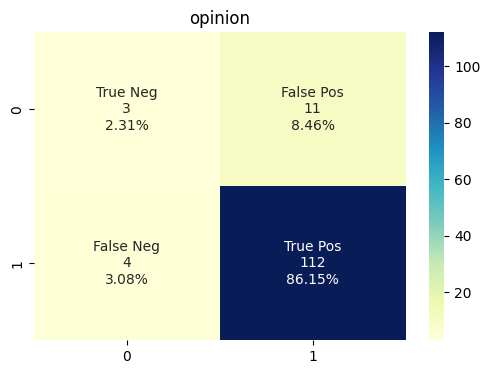

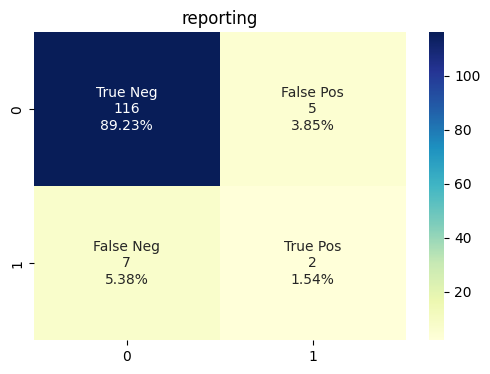

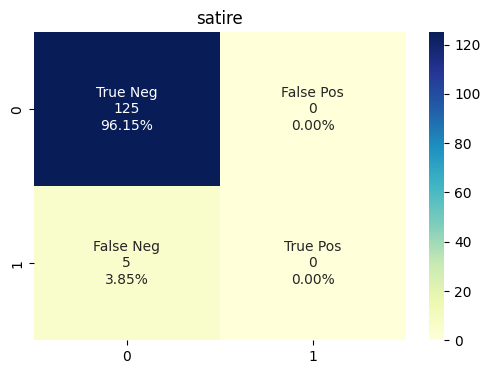

In [ ]:
print("SVM metrics: ")
print(classification_report(labels_test,svc_pred, zero_division=0))
plt_confusion_matrix(labels_test,svc_pred)

Random Forest metrics: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       116
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5

    accuracy                           0.88       130
   macro avg       0.30      0.33      0.31       130
weighted avg       0.80      0.88      0.84       130



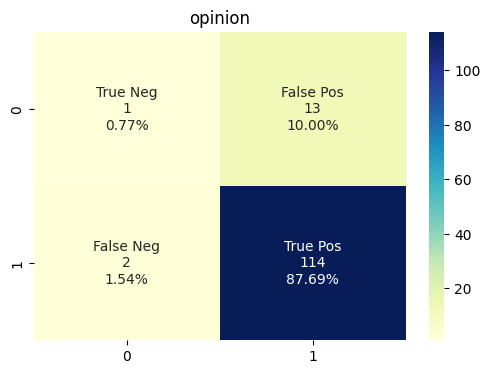

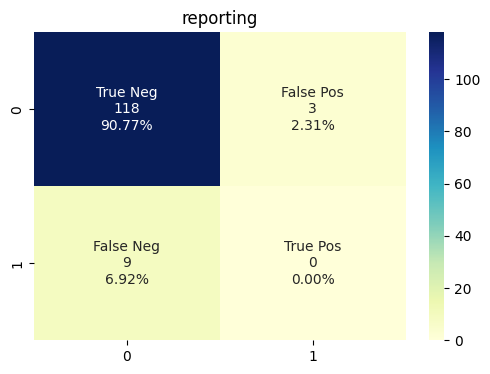

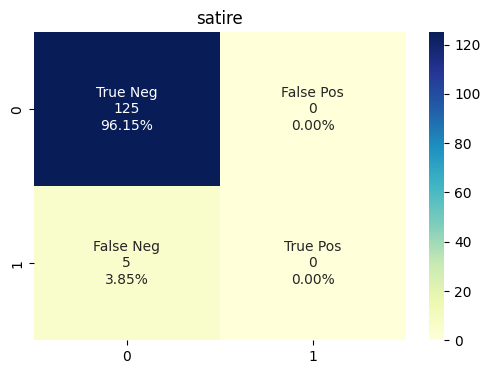

In [ ]:
print("Random Forest metrics: ")
print(classification_report(labels_test,rfc_pred, zero_division=0))
plt_confusion_matrix(labels_test,rfc_pred)

Complement Naive Bayes: 
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       116
           1       0.12      0.44      0.19         9
           2       0.33      0.20      0.25         5

    accuracy                           0.71       130
   macro avg       0.46      0.46      0.42       130
weighted avg       0.85      0.71      0.76       130



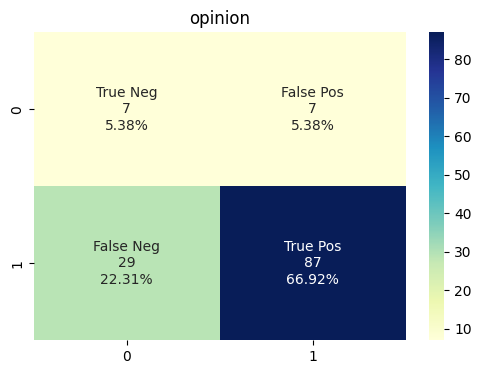

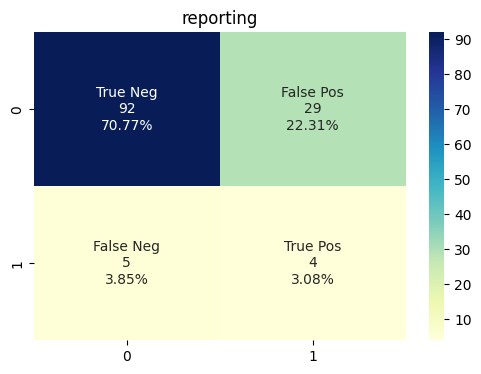

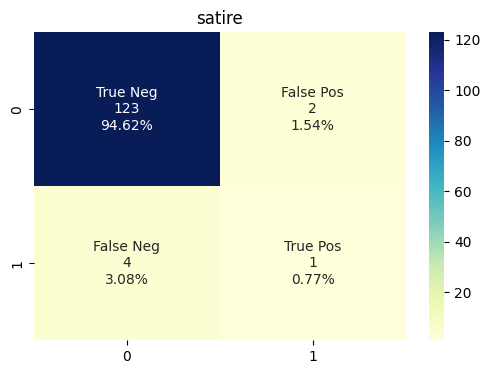

In [ ]:

print("Complement Naive Bayes: ")
print(classification_report(labels_test,cnbc_pred, zero_division=0))
plt_confusion_matrix(labels_test,cnbc_pred)

Multinomial Naive Bayes: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       116
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5

    accuracy                           0.89       130
   macro avg       0.30      0.33      0.31       130
weighted avg       0.80      0.89      0.84       130



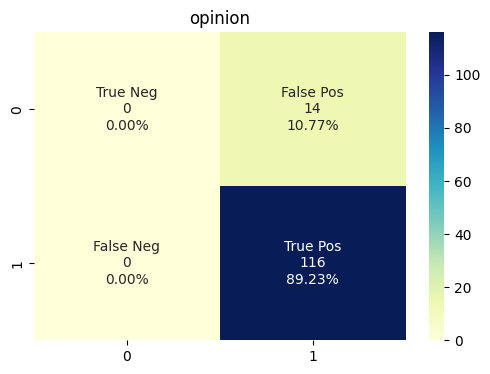

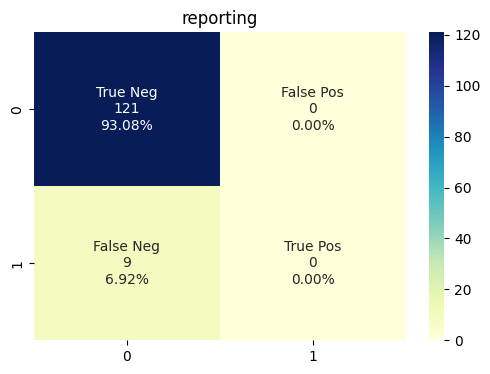

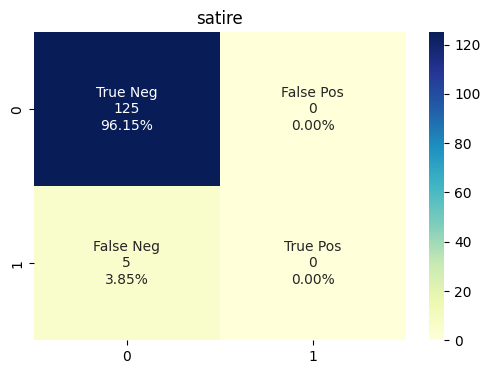

In [ ]:
print("Multinomial Naive Bayes: ")
print(classification_report(labels_test,mnbc_pred, zero_division=0))
plt_confusion_matrix(labels_test,mnbc_pred)